In [10]:
import numpy as np
import time
import scipy.integrate
import matplotlib.pyplot as plt

In [13]:
def cuadrado(x):
    return x * x
def integra_mc_iterativo(fun, a, b, num_puntos=10000):
    M = max(fun(np.linspace(a, b, num_puntos)))
    Ndebajo = 0
    
    for _ in range(num_puntos):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if y < fun(x):
            Ndebajo += 1
            
    I = Ndebajo / num_puntos * (b - a) * M
    return I
def integra_mc_vectorizado(fun, a, b, num_puntos=10000):
    M = max(fun(np.linspace(a, b, num_puntos)))
    x = np.random.uniform(a, b, num_puntos)
    y = np.random.uniform(0, M, num_puntos)
    Ndebajo = np.sum(y < fun(x))
    
    I = Ndebajo / num_puntos * (b - a) * M
    return I

In [9]:
a, b = 0, 2
num_puntos = 10000

inicio = time.time()
resultado_iterativo = integra_mc_iterativo(cuadrado, a, b, num_puntos)
tiempo_iterativo = time.time() - inicio

inicio = time.time()
resultado_vectorizado = integra_mc_vectorizado(cuadrado, a, b, num_puntos)
tiempo_vectorizado = time.time() - inicio

resultado_real, _ = scipy.integrate.quad(cuadrado, a, b)

print(f"Resultado iterativo: {resultado_iterativo}, Tiempo: {tiempo_iterativo}s")
print(f"Resultado vectorizado: {resultado_vectorizado}, Tiempo: {tiempo_vectorizado}s")
print(f"Resultado real: {resultado_real}")

Resultado iterativo: 2.7064, Tiempo: 0.049996137619018555s
Resultado vectorizado: 2.6224, Tiempo: 0.0010030269622802734s
Resultado real: 2.666666666666667


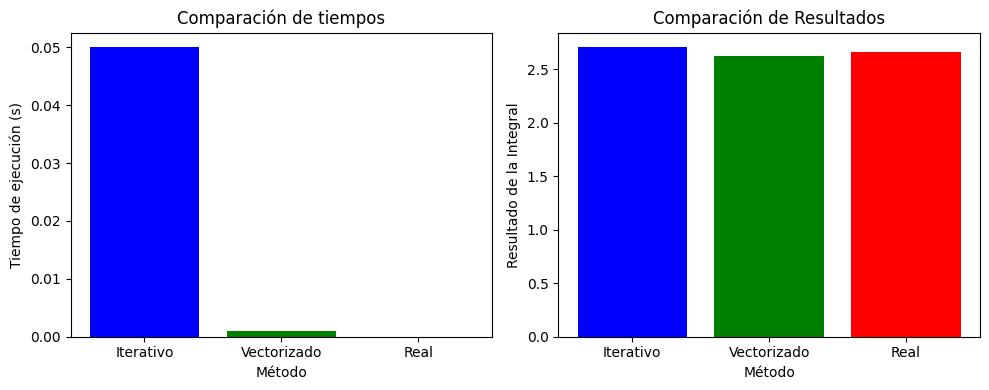

In [12]:
metodos = ['Iterativo', 'Vectorizado', 'Real']
resultados = [resultado_iterativo, resultado_vectorizado, resultado_real]
tiempos = [tiempo_iterativo, tiempo_vectorizado, 0]  

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(metodos, tiempos, color=['blue', 'green', 'red'])
plt.xlabel('Método')
plt.ylabel('Tiempo de ejecución (s)')
plt.title('Comparación de tiempos')

plt.subplot(1, 2, 2)  
plt.bar(metodos, resultados, color=['blue', 'green', 'red'])
plt.xlabel('Método')
plt.ylabel('Resultado de la Integral')
plt.title('Comparación de Resultados')

plt.tight_layout()  
plt.show()